# Extracting other restaurant from Zoomato

In a previous notebook, I extract data about take away in London registered to just-eat.com.
Trying to get an exhaustive list of restaurant across London, I'm adding in this notebook more restaurant data from Zomato website.
Zomato offers an api. The api propose to extract 20 restaurants at a latitude and longitude given.
This reach the following problem: With around 10000 restaurants in London -dinner- category, it would take 500 queries insofar as at each query we do no get duplicate restaurant information! We would then need the best latitude and longitude fit at each query to avoid duplicate data!
To that extent, I will use the 7000 take away location I already have. We indeed can assume that they are well distributed across London and we can divided those locations into clusters. The centre of each cluster would be our key latitude and longitude for the query into Zomato api.


In [272]:
import requests
import json
from bs4 import BeautifulSoup
import urllib2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast

In [273]:
#Extract the list of restaurant from just-eat.com
df=pd.read_csv("big_resto_file.csv")
del df["Unnamed: 0"]
df.head()

,Address,Cuisine,Minimum spend,Name,Number of votes,Ranking,Url,New_on_4_12_2016,Cuisine_1,Cuisine_2,Cuisine_3,group_cuisine,postcode,Postcode,London zone,district_code,District,Latitude,Longitude
0,"430 Downham Way, Bromley, BR1 5HR","Kebab, Pizza, Halal",12.0,Milano Kebab & Pizza,1422,5.0,https://www.just-eat.co.uk/restaurants-milanok...,0.0,Kebab,Pizza,Halal,Kebab,BR1 5HR,BR1 5HR,4.0,BR1,Lewisham,51.427427,0.013835
1,"89 Beckenham Lane, Bromley, BR2 0DN","Kebab, Pizza",10.0,Shortlands Kebab,247,5.0,https://www.just-eat.co.uk/restaurants-shortla...,0.0,Kebab,Pizza,NaN,Kebab,BR2 0DN,BR2 0DN,4.0,BR2,Bromley,51.406307,0.003661
2,"284 Sangley Road, Catford, SE6 2JT","Indian, Curry, Halal",12.0,Curry Cottage,1084,5.0,https://www.just-eat.co.uk/restaurants-curryco...,0.0,Indian,Curry,Halal,Indian,SE6 2JT,SE6 2JT,3.0,SE6,Lewisham,51.442254,-0.011329
3,"6a Randlesdown Road, Bellingham, SE6 3BT","Chinese, Oriental",0.0,China - Local,334,5.0,https://www.just-eat.co.uk/restaurants-china--...,0.0,Chinese,Oriental,NaN,Chinese,SE6 3BT,SE6 3BT,3.0,SE6,Lewisham,51.432745,-0.020129
4,"12 Addington Road, West Wickham, Kent, BR4 9BS",Indian,12.0,Zeera Spice,138,5.0,https://www.just-eat.co.uk/restaurants-zeera-s...,0.0,Indian,NaN,NaN,Indian,BR4 9BS,BR4 9BS,5.0,BR4,Bromley,51.373728,0.000902


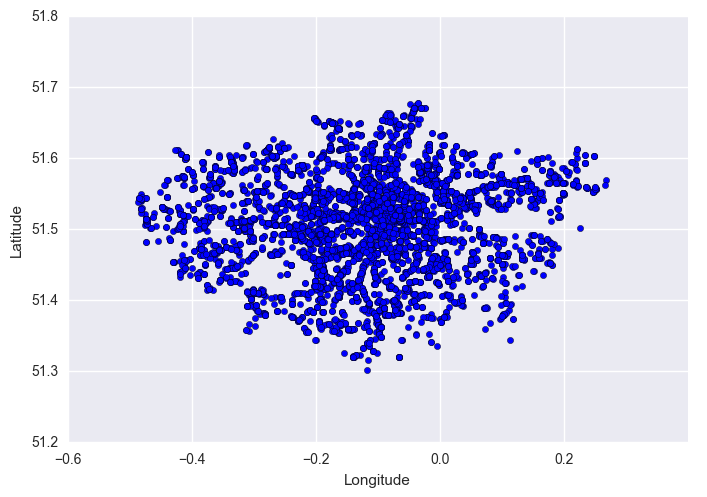

In [274]:
# This is representation of the distribution of take away restaurants in london 
plt.scatter(df["Longitude"],df["Latitude"])
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

In [275]:
#creating clusters of restaurant depending on the location
from sklearn.cluster import KMeans
km=KMeans(n_clusters=970, init='k-means++', n_init=10, max_iter=1000, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
coordinate=df[["Latitude","Longitude"]]
coordinate.dropna(inplace=True)
coordinate.reset_index(inplace=True, drop=True)
#fitting the nodel
km.fit(coordinate)
# adding the cluster number
coordinate["labels"]=km.labels_
#Registering the centroids of each clusters
cluster=pd.DataFrame(km.cluster_centers_,columns=['Latitude',"Longitude"])

/Users/dorian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dorian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


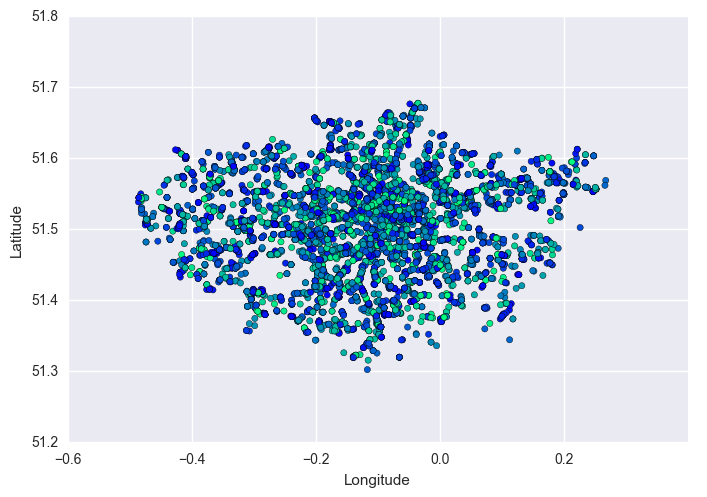

In [276]:
# plotting the distribution of restaurants accross London with their assigned cluster number
plt.scatter(coordinate["Longitude"],coordinate["Latitude"],c=coordinate["labels"],cmap='winter')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

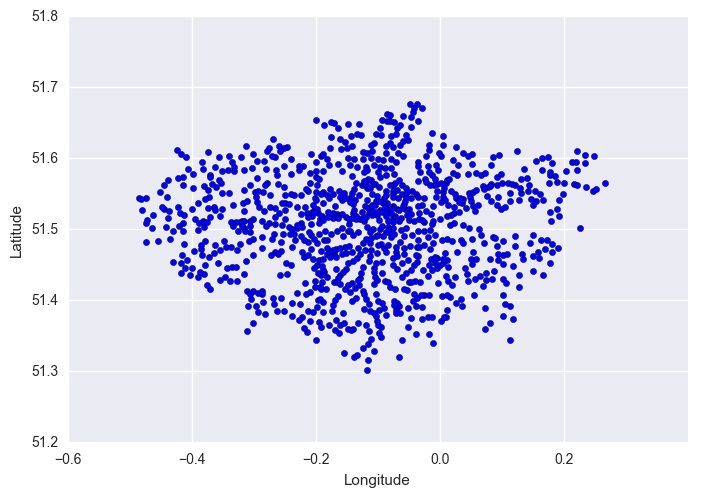

In [277]:
# plotting the map representing the centre location of each clusters
plt.scatter(cluster["Longitude"],cluster["Latitude"])
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

In [ ]:
listy_resto=[]
for i in range(len(cluster)):
    str1=cluster.iloc[i,0]
    str2=cluster.iloc[i,1]
    print i
    resto_20= !curl -X GET --header "Accept: application/json" --header "user-key: myapikey" "https://developers.zomato.com/api/v2.1/search?count=1000&lat={str1}&lon={str2}&radius=2000&sort=real_distance&order=asc"
    listy_resto.append(resto_20)

In [279]:
# saving the query into a csv
array=np.array(listy_resto)
df_l=pd.DataFrame(array)
df_l.to_csv("bazard_2.csv")

In [280]:
df_l.head()

,0
0,[ % Total % Received % Xferd Average Spee...
1,[ % Total % Received % Xferd Average Spee...
2,[ % Total % Received % Xferd Average Spee...
3,[ % Total % Received % Xferd Average Spee...
4,[ % Total % Received % Xferd Average Spee...
